# Machine Learning and Statistics: Hands On 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

Silence some expected warnings below.

In [2]:
import warnings, matplotlib.cbook
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=matplotlib.cbook.mplDeprecation)

## Exercise 1: Overfitting

For an extreme example of overfitting (=lack of ability to generalize), train a [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) using `n_neighbors=1`. First, load the data:

In [3]:
df_img_test = pd.read_hdf('data/sources_img_test.hf5')
df_img_test_normed = pd.read_hdf('data/sources_img_test_normed.hf5')
df_img_train_normed = pd.read_hdf('data/sources_img_train_normed.hf5')
nsrc_true_test = pd.read_hdf('data/nsrc_true_test.hf5')
nsrc_true_train = pd.read_hdf('data/nsrc_true_train.hf5')

Here is the driver function we used earlier:

In [4]:
from mls import plot_classification, scan_misclassified

In [5]:
def test_sk_classification(
    method, train_data=df_img_train_normed, test_data=df_img_test_normed):
    # Fit normed training images.
    fit = method.fit(train_data, nsrc_true_train)
    # Get training predictions.
    nsrc_train = fit.predict(train_data)
    plot_classification(nsrc_train, nsrc_true_train, label='train:')
    plt.show()
    # Get test predictions.
    nsrc_test = fit.predict(test_data)
    plot_classification(nsrc_test, nsrc_true_test, label='test:')
    plt.show()
    # Scan some test failures.
    scan_misclassified(nsrc_test, nsrc_true_test, df_img_test)
    plt.show()
    # Return the test predictions.
    return nsrc_test

In [6]:
from sklearn import neighbors

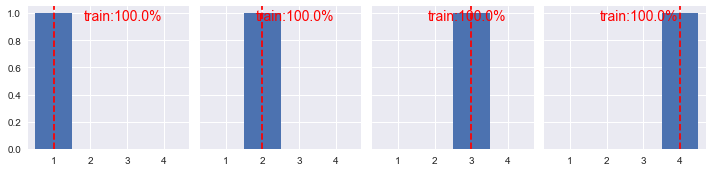

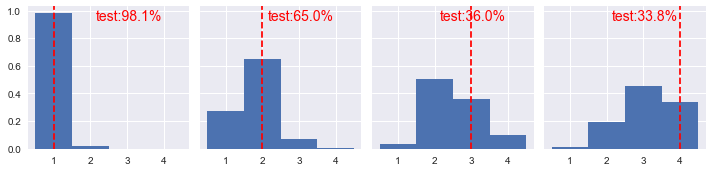

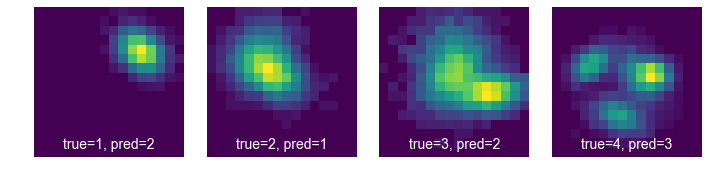

In [7]:
# Add your code here...
test_sk_classification(neighbors.KNeighborsClassifier(n_neighbors=1));

Do these results make sense based on how the KNeighborsClassifier [works](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)?

## Exercise 2: Regression Score

The default score used by all sklearn regression algorithms is the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), which you can calculate with sklearn using [metrics.r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html):

In [8]:
from sklearn import metrics

R2 = -1.561


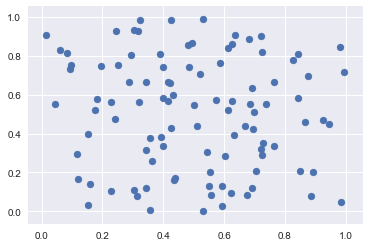

In [9]:
# Generate some random points.
gen = np.random.RandomState(seed=123)
true = gen.uniform(size=100)
pred = gen.uniform(size=100)
plt.scatter(true, pred)
R2 = metrics.r2_score(true, pred)
print(f'R2 = {R2:.3f}')

Write a similar example which has R2 = 1.

R2 = 1.000


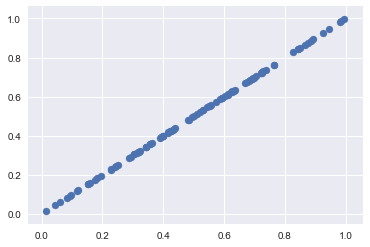

In [10]:
# Add your solution here...
gen = np.random.RandomState(seed=123)
true = gen.uniform(size=100)
pred = true.copy()
plt.scatter(true, pred)
R2 = metrics.r2_score(true, pred)
print(f'R2 = {R2:.3f}')

Write a similar example which has R2 = 0.

R2 = 0.000


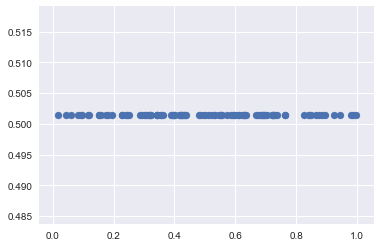

In [11]:
# Add your solution here...
gen = np.random.RandomState(seed=123)
true = gen.uniform(size=100)
pred = np.mean(true) * np.ones_like(true)
plt.scatter(true, pred)
R2 = metrics.r2_score(true, pred)
print(f'R2 = {R2:.3f}')

## Exercise 3: Interpretation

Machine learning involves running a lot of tests with careful book keeping, then interpreting the results. For a taste of this, make a table of training and test classifier performance from the examples in the lectures, showing:
 - the best of the sklearn classifiers
 - the DNN classifier
 - the CNN classifier
 
Now decide which is the "best" method based on these numbers. How are you defining "best"?

**ANSWER:** The best sklearn algorithm was Random Forest classification.

| Method | Sample | n=1  | n=2  | n=3  | n=4  |
|-----|-------|------|------|------|------|
| RF  | train | 100. | 99.1 | 97.8 | 97.6 |
|     | test  | 97.9 | 79.9 | 41.0 | 37.2 |
| DNN | train | 98.9 | 84.5 | 64.4 | 69.6 |
|     | test  | 98.9 | 81.2 | 63.0 | 62.6 |
| CNN | train | 98.4 | 83.5 | 59.8 | 52.6 |
|     | test  | 98.5 | 82.5 | 60.4 | 52.0 |

Observations:
 - RF has the best training performance and the worst generalization.
 - DNN has the best overall test performance, with CNN a close second.
 - CNN has slightly better generalization (for n=4).

Based on these observations, you could make an argument for preferring either DNN or CNN, depending on how you prioritize generalization over score. Another factor that does not appear in this table is training time, where the DNN is significantly faster.

## Exercise 4: Network Architecture

Train a dense network classifier with 64 nodes in both of the hidden layers, instead of 128. How does this affect the performance. (Hint: you will need to cut & paste liberally from the [NeuralNet notebook](NeuralNet.ipynb)).

In [12]:
import tensorflow as tf

In [13]:
from mls import plot_classification, scan_misclassified

In [14]:
mkdir -p tfs/dnnc64

In [15]:
dnnc_config = tf.estimator.RunConfig(
    model_dir='tfs/dnnc64',
    tf_random_seed=123
)

In [16]:
dnn_classifier = tf.estimator.DNNClassifier(
    config=dnnc_config,
    feature_columns=[tf.feature_column.numeric_column('image', shape=(256,))],
    hidden_units=[64, 64],
    activation_fn=tf.nn.relu,
    n_classes=4
)

INFO:tensorflow:Using config: {'_model_dir': 'tfs/dnnc64', '_tf_random_seed': 123, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a33634b70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
!rm -rf tfs/dnnc64/*

In [18]:
%%time
dnn_classifier.train(
    input_fn=tf.estimator.inputs.numpy_input_fn(
        x={'image': df_img_train_normed.values}, y=nsrc_true_train.values - 1,
        batch_size=1000, num_epochs=None, shuffle=True),
    steps=1000);

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into tfs/dnnc64/model.ckpt.
INFO:tensorflow:loss = 2251.2302, step = 1
INFO:tensorflow:global_step/sec: 182.874
INFO:tensorflow:loss = 390.6609, step = 101 (0.548 sec)
INFO:tensorflow:global_step/sec: 197.575
INFO:tensorflow:loss = 306.52185, step = 201 (0.506 sec)
INFO:tensorflow:global_step/sec: 203.846
INFO:tensorflow:loss = 279.54807, step = 301 (0.490 sec)
INFO:tensorflow:global_step/sec: 206.719
INFO:tensorflow:loss = 292.85272, step = 401 (0.484 sec)
INFO:tensorflow:global_step/sec: 197.908
INFO:tensorflow:loss = 247.18578, step = 501 (0.505 sec)
INFO:tensorflow:global_step/sec: 200.161
INFO:tensorflow:loss = 226.05167, step = 601 (0.500 sec)
INFO:tensorflow:global_step/sec: 200.28
INFO:tensorflow:loss = 2

In [19]:
def get_classification_predictions(network, X):
    n = len(X)
    nsrc = np.empty(n, int)
    probs = np.empty((n, 4))
    predicted = network.predict(
        input_fn=tf.estimator.inputs.numpy_input_fn(
            x={'image': X}, y=None, num_epochs=1, shuffle=False))
    for i, pred in enumerate(predicted):
        if 'class_ids' in pred:
            class_id = pred['class_ids'][0]
        else:
            class_id = pred['class_id']
        nsrc[i] = class_id + 1
        probs[i] = pred['probabilities']
    return nsrc, probs

In [20]:
def test_nn_classification(
    network, train_data=df_img_train_normed, test_data=df_img_test_normed):
    # Temporarily disable INFO logging.
    saved_verbosity = tf.logging.get_verbosity()
    tf.logging.set_verbosity(tf.logging.WARN)
    # Get training predictions.
    nsrc_train, probs_train = get_classification_predictions(
        network, train_data.values)
    plot_classification(nsrc_train, nsrc_true_train, label='train:')
    plt.show()
    # Get test predictions.
    nsrc_test, probs_test = get_classification_predictions(
        network, test_data.values)
    plot_classification(nsrc_test, nsrc_true_test, label='test:')
    plt.show()
    # Scan some test failures.
    scan_misclassified(nsrc_test, nsrc_true_test, df_img_test)
    # Restore logging.
    tf.logging.set_verbosity(saved_verbosity)
    # Return the test predictions.
    return nsrc_test, probs_test

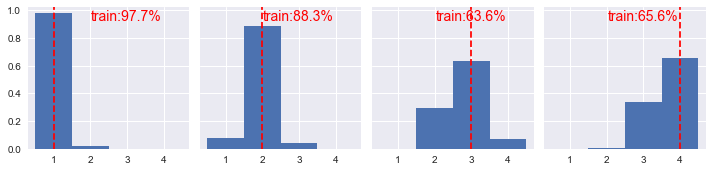

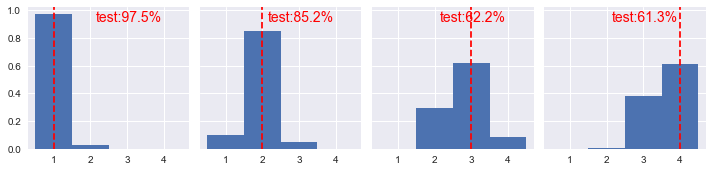

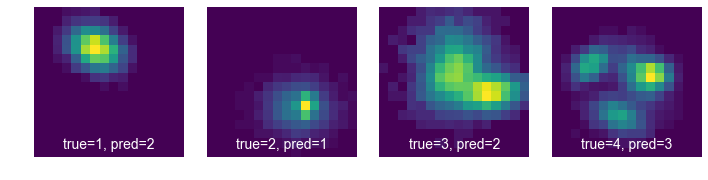

In [21]:
test_nn_classification(dnn_classifier);

| hidden nodes | sample | n=1 | n=2 | n=3 | n=4 |
|--------------|--------|-----|-----|-----|-----|
|  64 | train | 98.9 | 84.5 | 64.4 | 69.6 |
|     | test  | 98.8 | 81.2 | 63.0 | 62.6 |
| 128 | train | 97.8 | 85.8 | 70.1 | 70.7 |
|     | test  | 97.7 | 83.0 | 67.5 | 66.4 |

To put your results in perspective, calculate how many weights the 128-node and 64-node networks each have (both have 256 input nodes and 4 output nodes).  What do you learn from this?

The number of weights with $n_1$ and $n_2$ nodes in the two hidden layers equals:
$$
n_{in} n_1 + n_1 n_2 + n_2 n_{out}
$$

In [22]:
def num_weights(n1, n2, nin=256, nout=4):
    return nin * n1 + n1 * n2 + n2 * nout

print(num_weights(64, 64), num_weights(128, 128))

20736 49664


Since both architectures have very similar performance, but the 128-node network has more than double the number of weights, this indicates that we are not close to saturating the learning capacity of these networks.

## Exercise 5: Mission Impossible?

We found that the [LinearSVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html) regression had $R^2\simeq 0$ with its default hyperparameters, so did not learn anything useful from the training data.  Can you save its reputation and find a set of hyperparameters where it gives respectable performance?

**ANSWER:** This is a good research problem, so let me know if you find a solution!